<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 2</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:farzaneh.hatami@ut.ac.ir">Farzaneh Hatami</a><br></font><br>
    </div>
</div>

# EDA and Visualization

## Part1 - EDA and Visualization

1. A quick peek at the data

In [26]:
! gdown 1Oz-QDr2hphKek_ShOhDNt9cBeXE0MfgL
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

plt.style.use("ggplot")

Downloading...
From: https://drive.google.com/uc?id=1Oz-QDr2hphKek_ShOhDNt9cBeXE0MfgL
To: /content/taxis.csv
100% 900k/900k [00:00<00:00, 30.7MB/s]


In [3]:
df = pd.read_csv("taxis.csv", index_col=[0])
df["pickup"] = pd.to_datetime(df["pickup"])
df["dropoff"] = pd.to_datetime(df["dropoff"])
# print(df.describe())
print(df.dtypes)
print("NaN:", df.isna().sum())
df.head()

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object
NaN: pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


<blockquote>

The data is loaded fine. The dtypes are printed as well. pickup and dropoff were initially read as object which we fixed by pd.to_datetime. passengers is integer, there are some float numbers and others are strings which are known as object in pandas. Some of these objects like color are categorical can be changed to Categorical type. However, it is not necessary as the data is small and we do not have memory issues. Additionally, we have NaN values in columns like payment, pickup_zone, ... which are printed above with how many of nans are there.

2. Number of trips

```
# This is formatted as code
len(df)
6433
```
Number of trips = 6433



In [4]:
len(df)

6433

3. Number of unique pickup-zones

In [5]:
len(df["pickup_zone"].unique())

195

4. Most frequent drop-zones

In [6]:
df["dropoff_zone"].value_counts()

Upper East Side North        245
Murray Hill                  220
Midtown Center               215
Upper East Side South        177
Midtown East                 176
                            ... 
Bensonhurst East               1
Springfield Gardens South      1
East Flushing                  1
Brighton Beach                 1
Ozone Park                     1
Name: dropoff_zone, Length: 203, dtype: int64

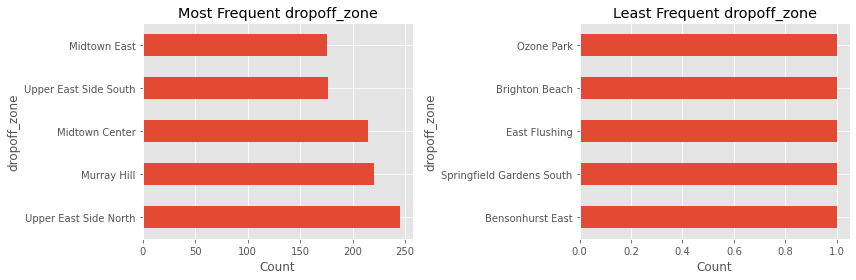

In [7]:
# a
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df["dropoff_zone"].value_counts()[:5].plot(kind="barh", title="Most Frequent dropoff_zone")
plt.xlabel("Count")
plt.ylabel("dropoff_zone")
plt.subplot(1, 2, 2)
df["dropoff_zone"].value_counts()[-5:].plot(kind="barh", title="Least Frequent dropoff_zone")
plt.xlabel("Count")
plt.ylabel("dropoff_zone")
plt.tight_layout()
plt.show()

<blockquote>

b) The most frequent dropoff zone is Upper East Side North with 245 occurances. On the other hand there are multiple drop off zones with only 1 occurance such as Ozone Park. First observation is that this distribution might be skewed and we need to plot more zones to realize that. If this data is correct and there are no biases in the data itself, we can say that we know the busiest drop off zones and the least busy drop off zones from these two plots.

5. Percentage of drop-offs and pick-ups per weekday

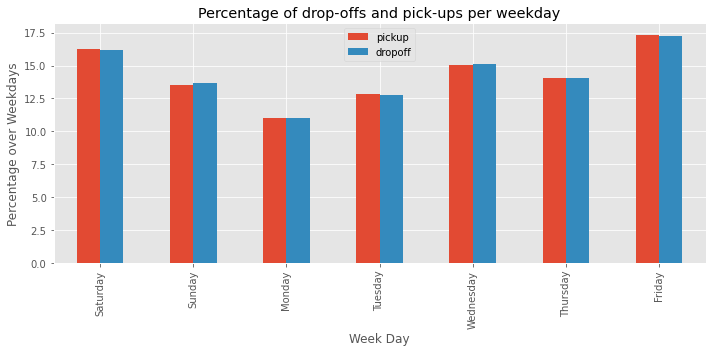

In [8]:
# Groupby weekday
pickup_count = df.groupby(df['pickup'].dt.day_name())['pickup'].count()
dropoff_count = df.groupby(df['dropoff'].dt.day_name())['dropoff'].count()
# Compute Percentage
pickup_percentage = pickup_count / pickup_count.sum() * 100
dropoff_percentage = dropoff_count / dropoff_count.sum() * 100
# Merge pickup & dropoff
pickup_dropoff = pd.DataFrame()
pickup_dropoff["pickup"] = pickup_percentage
pickup_dropoff["dropoff"] = dropoff_percentage
# Sort Weekdays
weekdays = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
pickup_dropoff = pickup_dropoff.reindex(weekdays)
# Plot
pickup_dropoff.plot(kind="bar", grid=True, figsize=(10, 5),
                    title="Percentage of drop-offs and pick-ups per weekday")
plt.xlabel("Week Day")
plt.ylabel("Percentage over Weekdays")
plt.tight_layout()
plt.show()

<blockquote>

Based on the plots, first of all we see that pickups and dropoffs are corerlated. Meaning, any day that one goes up the increases too and viceversa. Based on the data these actually should be equal, because every pickup has a dropoff. The discrepancy can come from the fact that one trip can start in one day (around midnight) and end the next day. Moreover, generally around Mondays we have less occurances; whereas, around Saturday and Fridays we have the most occurances. As this is NYC data, it shows that people use taxis more in the weekends, which can have many factors such as getting drunk and being unable to drive, or going to parties (Assuming people go to work by subway or other transportation.) All these are guesses, but what data shows for sure is the weekends are busy days for taxis.

6. Number of pick-ups and drop-offs per hour of day

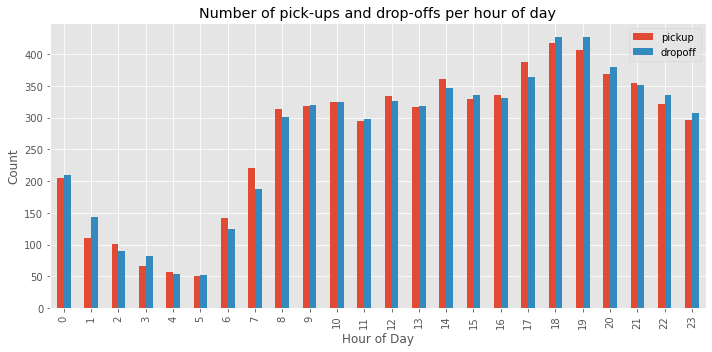

In [9]:
# Groupby hour
pickup_count = df.groupby(df['pickup'].dt.hour)['pickup'].count()
dropoff_count = df.groupby(df['dropoff'].dt.hour)['dropoff'].count()
# Merge pickup & dropoff
pickup_dropoff = pd.DataFrame()
pickup_dropoff["pickup"] = pickup_count
pickup_dropoff["dropoff"] = dropoff_count
# Plot
pickup_dropoff.plot(kind="bar", grid=True, figsize=(10, 5),
                    title="Number of pick-ups and drop-offs per hour of day")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<blockquote>

The pickup and dropoff are again very correlated (Except when trip starts in one hour and ends in the next which causes unequality between them).
More importantly we see that most trips happen from around 8AM until 23PM. And there are very few trips between 1AM and 6AM. This expected as people are mostly at home and sleeping at night and commute during the day.

7.  Most frequents payment per weekday

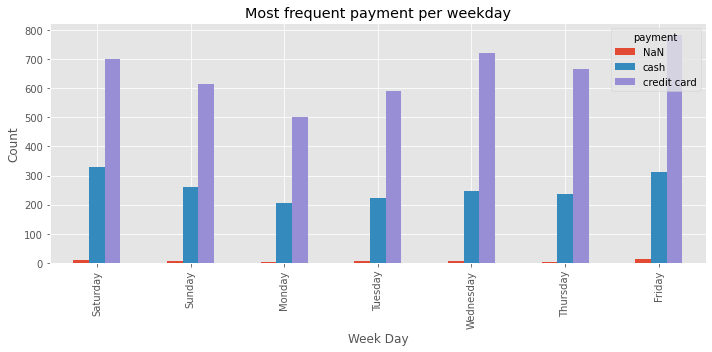

payment,NaN,cash,credit card,Most Frequent Payment
dropoff,,,,
Saturday,10,329,700,credit card
Sunday,5,260,615,credit card
Monday,2,205,502,credit card
Tuesday,6,223,590,credit card
Wednesday,5,248,721,credit card
Thursday,4,235,666,credit card
Friday,12,312,783,credit card


In [10]:
# Groupby weekday
payment_count = df.fillna("NaN").groupby([df['dropoff'].dt.day_name(), 'payment'])['payment'].count().unstack()
# Sort Weekdays
weekdays = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
payment_count = payment_count.reindex(weekdays)
# Plot
payment_count.plot(kind="bar", grid=True, figsize=(10, 5),
                    title="Most frequent payment per weekday")
plt.xlabel("Week Day")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
# Most Frequent Values
payment_count["Most Frequent Payment"] = "NaN"
payment_count.loc[payment_count["cash"] > payment_count["credit card"], "Most Frequent Payment"] = "cash"
payment_count.loc[payment_count["cash"] <= payment_count["credit card"], "Most Frequent Payment"] = "credit card"
payment_count

<blockquote>

As seen in the plot, credit card is the most frequent payment method every day of the week by a significant margin. I also used fillna to have an approximation of how much NaN we have. Fortunately, they are very minor and cannot change the result.

8. Number of trips per passengers

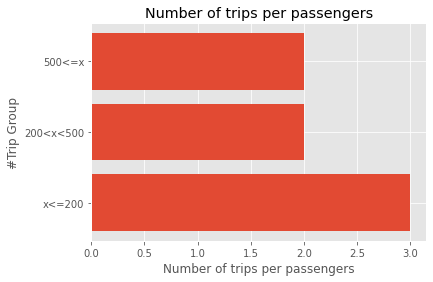

,pickup,x<=200,200<x<500,500<=x
passengers,,,,
0,96,True,False,False
1,4678,False,False,True
2,876,False,False,True
3,243,False,True,False
4,110,True,False,False
5,277,False,True,False
6,153,True,False,False


In [13]:
passengers = pd.DataFrame(df.groupby(["passengers"])["pickup"].count())
passengers["x<=200"] = passengers["pickup"] <= 200
passengers["200<x<500"] = (passengers["pickup"] > 200) & (passengers["pickup"] < 500)
passengers["500<=x"] = passengers["pickup"] >= 500

plt.barh(["x<=200", "200<x<500", "500<=x"], 
         [passengers["x<=200"].sum(), passengers["200<x<500"].sum(), passengers["500<=x"].sum()])
plt.ylabel("#Trip Group")
plt.xlabel("Number of trips per passengers")
plt.title("Number of trips per passengers")
plt.show()
passengers

<blockquote>

We first grouped by number of passengers and found the number of trips per passengers. Then added the three groups of ranges and checked for each passenger count which bucket they fall in. And in the end we see that 3 number of passengers have less than 200 trips. And 2 between 200 and 500, and 2 more than 500. (I think the real question was about the unique passengers and not the number of passengers in each trip. That way we could see a histogram of number of real passengers' number of trips. Like maybe we could see most passengers had less than 200 trips. But with this data that we have, we can only say that bucket of 1 to 200 has the most frequency of number of passengers. Actually for these 7 categories of passengers we could just use a bar plot with 7 bars. That is why I think the data should have had the unique id of passengers. Then we had many passengers and we actually needed a histogram and grouping by number of trips.) 

9. Number of trips with or without a dropoff-zone

In [14]:
print("Without a dropoff zone:", df["dropoff_zone"].isna().sum())
print("With a dropoff zone:", (~df["dropoff_zone"].isna()).sum())
# Or
df["dropoff_zone"].isna().value_counts()

Without a dropoff zone: 45
With a dropoff zone: 6388


False    6388
True       45
Name: dropoff_zone, dtype: int64

<blockquote>
We saw this in the beginning: some columns, including dropoff zone, had nan values. Precicely 45 nan and the other 6388 have values.

10.Most frequent color among trips with a dropoff-zone

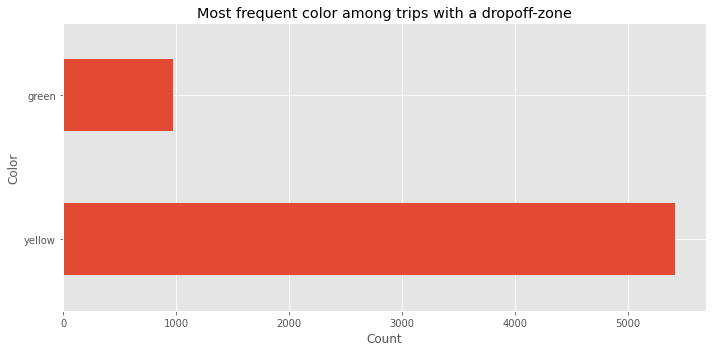

In [15]:
colors = df[(~df["dropoff_zone"].isna())]["color"].value_counts()
colors.plot(kind="barh", grid=True, figsize=(10, 5), 
            title="Most frequent color among trips with a dropoff-zone")
plt.xlabel("Count")
plt.ylabel("Color")
plt.tight_layout()
plt.show()

<blockquote>

Clearly "yellow" is the most frequent color in trips with a specified dropoff_zone.

## Part2 - Dimention Rednction

### Selection

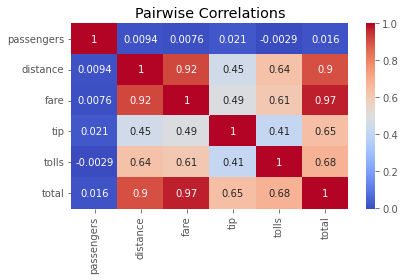

In [21]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap='coolwarm')
plt.title("Pairwise Correlations")
plt.tight_layout()
plt.show()

<blockquote>

Based on the heatmap of correalations, **fare** has high correlations with distance, and total, and less on tolls and tip and not at all related to number of passengers. This is intuitively true as longer trips will require more fare, and total paid price is mostly comprised of the fare. And tolls and tip does not necessarilty relate to the fare. So distance and total are the most important features we need to keep. (For multiple feature selection actually we need to do more in depth analysis mentioned in Statistic Inference. For instance in this case that both distance and total have high corrlation with fare, only one of them might be enough and keeping the other be redundant. And finding out how much the other features that are loosely correlated can explain the remaining uncertatinty needs more experiments. After selecting the first best feature, we need to do [F-test](https://en.wikipedia.org/wiki/F-test) or Chi-Squared. There are multiple methods mentioned here: https://scikit-learn.org/stable/modules/feature_selection.html). There are also other ways, such as training a linear model for fare and see the weight of each feature and decide based on that. (In this case we could use the categorical values as well. We could also change the datetime values into hour of day and use that too)

### PCA

In [22]:
# PCA
pca = PCA(n_components=2)
projections = pca.fit_transform(df[["passengers", "distance", "tip", "tolls", "total"]])

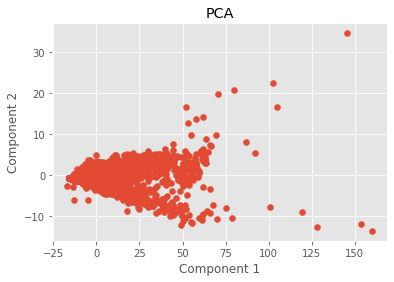

In [23]:
# Plot
plt.scatter(projections[:, 0], projections[:, 1])
plt.title("PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

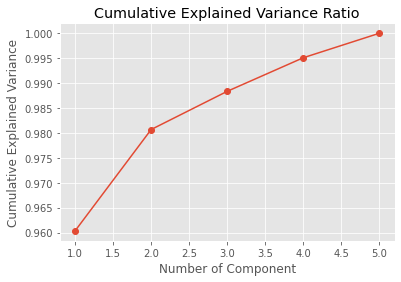

In [24]:
# PCA
pca = PCA(n_components=5)
projections = pca.fit_transform(df[["passengers", "distance", "tip", "tolls", "total"]])
plt.plot(range(1, 6), pca.explained_variance_ratio_.cumsum(), "-o")
plt.title("Cumulative Explained Variance Ratio")
plt.xlabel("Number of Component")
plt.ylabel("Cumulative Explained Variance")
plt.show()

<blockquote>

Actually even one elemnt in this dataset can explain most of the variance (which was also seen in the high correlations). But to be sure, we use n=3 components where we get about 99% explained variance. Intuitively, when all components are available, the cumulative explained variance ratio goes up to 100%.

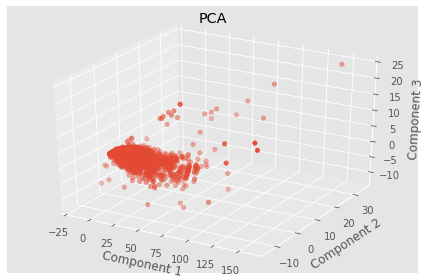

In [25]:
pca = PCA(n_components=3)
projections = pca.fit_transform(df[["passengers", "distance", "tip", "tolls", "total"]])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(projections[:, 0], projections[:, 1], projections[:, 2])
plt.title("PCA")
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.tight_layout()
plt.show()

# 3)
<blockquote>

First appraoch only uses the pairwise correlations between features. Also when we select only a few features, we lose all the information in the discarded features. On the other hand, PCA finds the best directions on which the data will have the most variance. Therefore, when we select 2 components from PCA, we are actually using the best of all features, and not losing some features entirely. The basic difference is that PCA transforms features but feature selection selects features without transforming them. PCA is a dimensionality reduction method but not feature selection method. First approach is more interpretable and easier to do as we just keep some features and in the real world situations we can even stop recording the other features we discarded. This can help us in computation and cost. However, PCA can find better spaces and keep the best parts of each dimension.

Also I should explain that for logistic tasks we can use LDA 
*   https://en.wikipedia.org/wiki/Linear_discriminant_analysis
*   https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

If we know we want to predict one feature, we can use LDA and tell it what is the target y. This way LDA will try to find the best transformation for discriminating that specific feature, and not general discrimination. PCA only tries to maximise variance in general not specific to discriminating a target feature which makes it less efficient for targeted tasks.

For accurate comparison we use 1 component and plot both methods plots. We see that PCA finds the best of all features in one component and has a higher correlation with fare. On the other hand, feature selection using distance, is still correlated but has some outliers which maybe could be solved by using more features (Also using total is better, for clear explaination and seeing the difference we used distance)

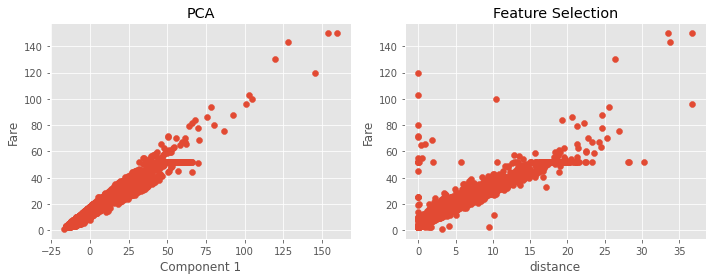

In [43]:
pca = PCA(n_components=1)
projections = pca.fit_transform(df[["passengers", "distance", "tip", "tolls", "total"]])

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(projections[:, 0], df["fare"])
plt.title("PCA")
plt.xlabel("Component 1")
plt.ylabel("Fare")

plt.subplot(1, 2, 2)
plt.scatter(df["distance"], df["fare"])
plt.title("Feature Selection")
plt.xlabel("distance")
plt.ylabel("Fare")

plt.tight_layout()
plt.show()

## Part3 - Using Figure

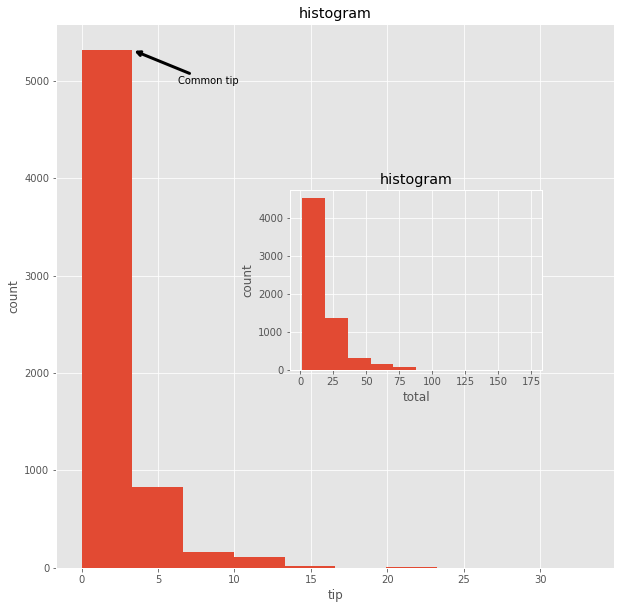

In [46]:
#Plot
fig = plt.figure(figsize=(10, 10))
ax1 = plt.gca()
ybins, xbins, _ = ax1.hist(df["tip"])
ax1.set_title("histogram")
ax1.set_ylabel("count")
ax1.set_xlabel("tip")

ax2 = fig.add_axes([0.45, 0.40, 0.35, 0.25])
ax2.hist(df["total"])
ax2.set_title("histogram")
ax2.set_ylabel("count")
ax2.set_xlabel("total")

argmax = np.argmax(ybins)
x = xbins[argmax + 1]
y = max(ybins)
ax1.annotate("Common tip",
            xy=(x, y), xycoords='data',
            xytext=(x + 3, y - 350), textcoords='data',
            arrowprops=dict(arrowstyle="->", color='black', linewidth=3,
                            connectionstyle="arc3"),
            )
plt.show()

<blockquote>

For finding the most common tip, we use the argmax of ybins and find the place on xbins. Consequently, we have x and y of the most common bin. Then we use annotate to add the annotation and its arrow.

In [45]:
! jupyter nbconvert --to html /content/DA_HW3_MohsenFayyaz.ipynb

[NbConvertApp] Converting notebook /content/DA_HW3_MohsenFayyaz.ipynb to html
[NbConvertApp] Writing 703057 bytes to /content/DA_HW3_MohsenFayyaz.html
